In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

# Set plot style for better visuals
plt.style.use("seaborn-v0_8")

In [2]:
# Reading data
df = pd.read_csv("davkovac.txt", sep=r"\s+", header=None, names=["weight"])
x = df["weight"]
print("Data loaded successfully.")

Data loaded successfully.


In [3]:
# Summary
print(x.describe())
print(f"Skewness: {x.skew()}")
print(f"Kurtosis: {x.kurtosis()}")

count    50.000000
mean     24.546894
std       0.458528
min      23.653900
25%      24.205050
50%      24.523420
75%      24.887985
max      25.489240
Name: weight, dtype: float64
Skewness: 0.09593675056378767
Kurtosis: -0.6732486351795197


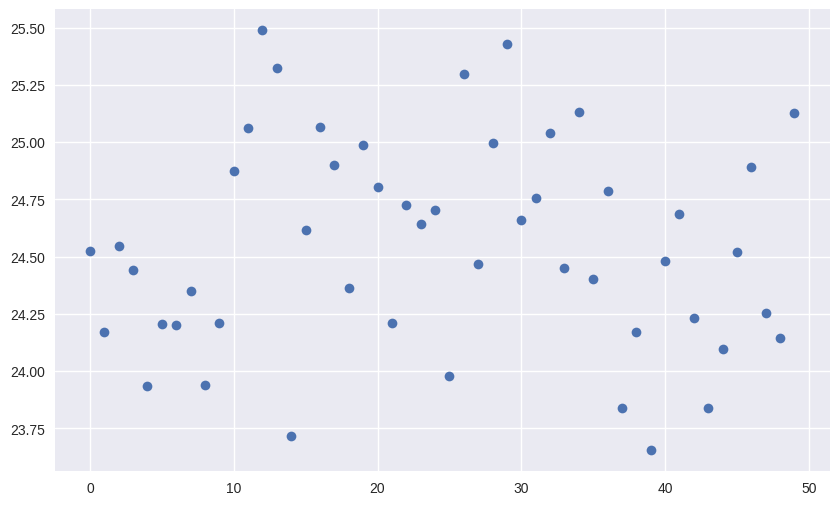

In [4]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.plot(x, "o")
plt.show()

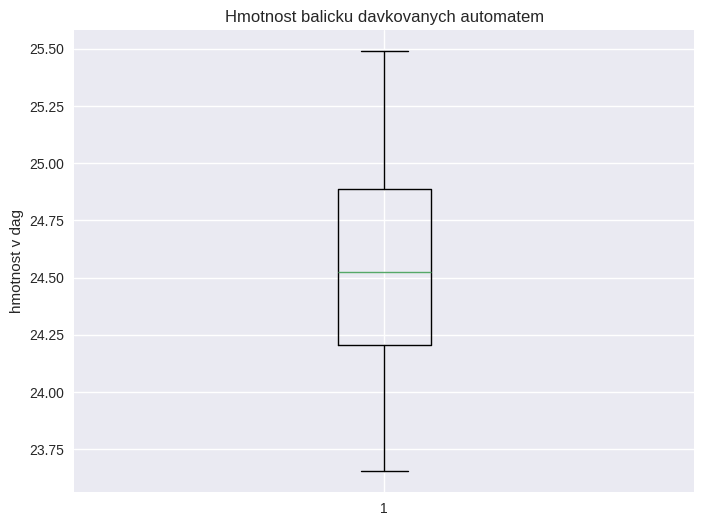

In [5]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(x)
plt.title("Hmotnost balicku davkovanych automatem")
plt.ylabel("hmotnost v dag")
plt.show()

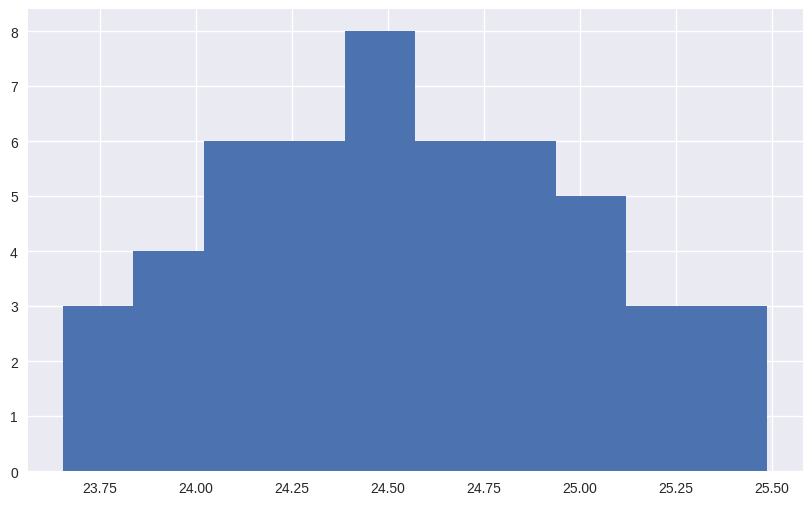

Counts: [3 4 6 6 8 6 6 5 3 3]
Bins: [23.6539   23.837434 24.020968 24.204502 24.388036 24.57157  24.755104
 24.938638 25.122172 25.305706 25.48924 ]


In [6]:
# Histograms and Density Analysis
plt.figure(figsize=(10, 6))
plt.hist(x)
plt.show()

# Printing histogram frequency table (simulated)
counts, bins = np.histogram(x)
print("Counts:", counts)
print("Bins:", bins)

Counts: [3 4 6 6 8 6 6 5 3 3]
Bins: [23.6539   23.837434 24.020968 24.204502 24.388036 24.57157  24.755104
 24.938638 25.122172 25.305706 25.48924 ]


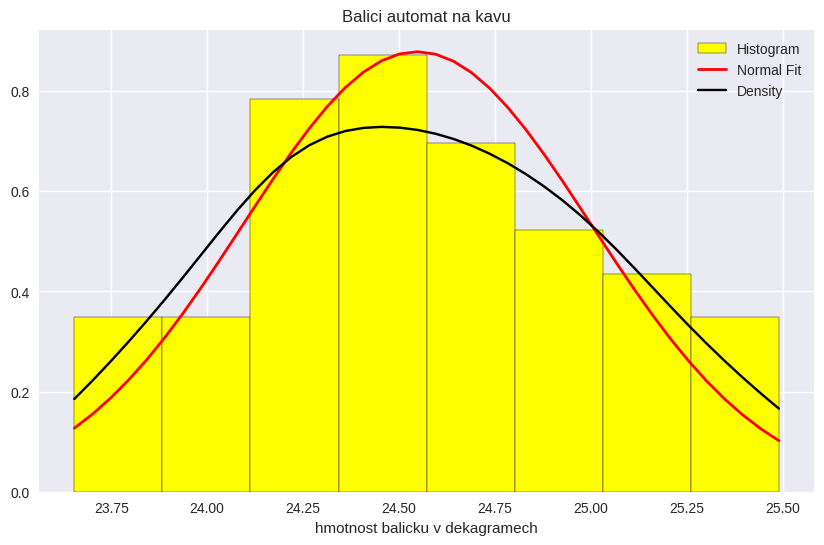

In [7]:
# Probability density histogram with custom color and bins
counts, bins = np.histogram(x)
print("Counts:", counts)
print("Bins:", bins)

plt.figure(figsize=(10, 6))
plt.hist(x, bins=8, density=True, color="yellow", edgecolor="black", label="Histogram")
plt.title("Balici automat na kavu")
plt.xlabel("hmotnost balicku v dekagramech")

# Normal Distribution Curve
xfit = np.linspace(min(x), max(x), 40)
mu, std = stats.norm.fit(x)
yfit = stats.norm.pdf(xfit, mu, std)
plt.plot(xfit, yfit, "r-", linewidth=2, label="Normal Fit")

# Density Line
kde = stats.gaussian_kde(x)
plt.plot(xfit, kde(xfit), "k-", label="Density")

plt.legend()
plt.show()

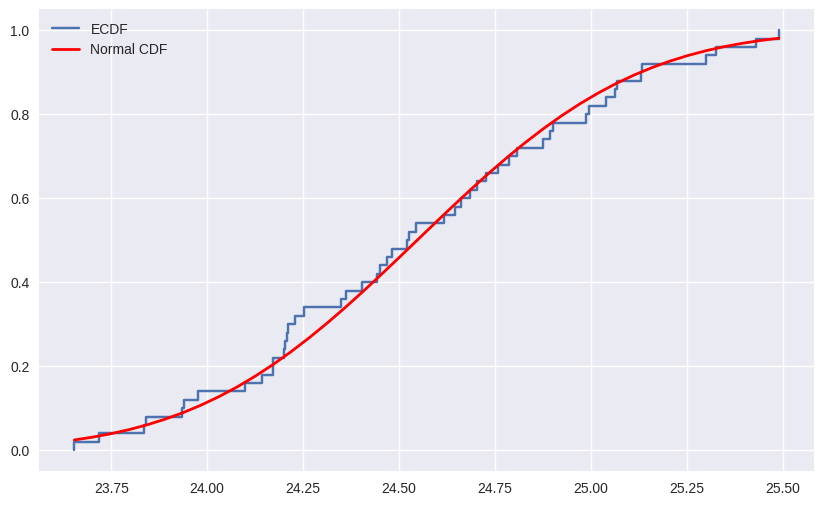

In [8]:
# Empirical Cumulative Distribution Function (ECDF)
# plot(ecdf(x), verticals = FALSE, do.points="FALSE")
ecdf = ECDF(x)
plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, where="post", label="ECDF")

# Normal CDF
xfit = np.linspace(min(x), max(x), 40)
mu, std = stats.norm.fit(x)
zfit = stats.norm.cdf(xfit, mu, std)
plt.plot(xfit, zfit, "r-", linewidth=2, label="Normal CDF")

plt.legend()
plt.show()

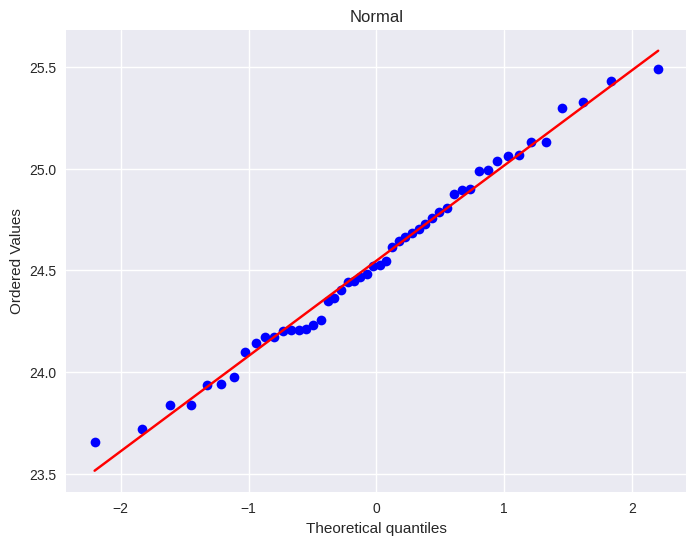

In [9]:
# Q-Q Plot (To visually check for normality)
plt.figure(figsize=(8, 6))
stats.probplot(x, dist="norm", plot=plt)
plt.title("Normal")
plt.show()

In [10]:
# Hypothesis tests to determine if data follows a normal distribution
print("Shapiro-Wilk Test:", stats.shapiro(x))
print("Anderson-Darling Test:", stats.anderson(x, dist="norm"))
print("Jarque-Bera Test:", stats.jarque_bera(x))

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.9840624645469049), pvalue=np.float64(0.7306730022559098))
Anderson-Darling Test: AndersonResult(statistic=np.float64(0.1988257771354469), critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(24.546893999999998), scale=np.float64(0.45852795360895526))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Jarque-Bera Test: SignificanceResult(statistic=np.float64(1.1684788516770899), pvalue=np.float64(0.5575297433120879))
